<a href="https://colab.research.google.com/github/MangoHaha/MLFromScratch/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
import sys

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/MLFromScratch')
sys.path.insert(0,"./utils")

from data_manipulation import divide_on_feature
from data_manipulation import train_test_split, standardize
from data_operation import calculate_entropy, accuracy_score
from data_operation import mean_squared_error, calculate_variance
from principal_component_analysis import PCA

In [0]:
class KMeans():
  def __init__(self, K=1, itr=1):
    self.K = K
    self.itr = itr
  
  def predict(self, X):
    centroids = self._init_cluster(X)
    
    for i in range(self.itr):
      clusters = self._get_clusters(X, centroids)
      pre_centroids = centroids
      centroids = self._calculate_centroids(clusters, X)
      
      diff = pre_centroids - centroids
      
      if not diff.any():
        break;
    return self._get_cluster_labels(clusters, X)
  
  def _init_cluster(self, X):
    return X[np.random.choice(np.shape(X)[0], self.K)]
  
  def _get_clusters(self, X, centroids):
    clusters = [[] for i in range(self.K)]
    for X_i in range(np.shape(X)[0]):
      cluster = self._closest_centroids(X[X_i], centroids)
      clusters[cluster].append(X_i)
    return clusters
  
  def _closest_centroids(self, x, centroids):
    index = 0
    max_distance = 0
    for i, c in enumerate(centroids):
      distance = np.power((c - x), 2).sum();
      if(distance < max_distance):
        max_distance = distance
        index = i
    return index
  
  def _calculate_centroids(self, clusters, X):
    centroids = []
    for cluster in clusters:
      centroids.append(np.mean(X[cluster], axis=0))
    return centroids
    
  # Classify samples as the index of their clusters
  def _get_cluster_labels(self, clusters, X):
      # One prediction for each sample
      y_pred = np.zeros(np.shape(X)[0])
      for cluster_i, cluster in enumerate(clusters):
          for sample_i in cluster:
              y_pred[sample_i] = cluster_i
      return y_pred   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


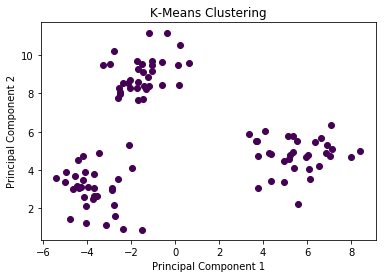

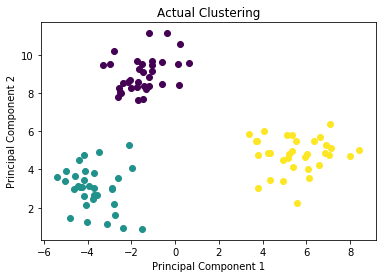

In [28]:
def main():
    # Load the dataset
    X, y = datasets.make_blobs()

    # Cluster the data using K-Means
    clf = KMeans(K=3)
    y_pred = clf.predict(X)

    # Project the data onto the 2 primary principal components
    pca = PCA()
    pca.plot_in_2d(X, y_pred, title="K-Means Clustering")
    pca.plot_in_2d(X, y, title="Actual Clustering")


if __name__ == "__main__":
    main()